In [31]:
!pip install pandas numpy matplotlib seaborn
!pip install pandas jupyter
!pip install numpy matplotlib seaborn

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
import pandas as pd

# Load the dataset (update the path if needed)
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Display the first few rows
print("🔹 First 5 rows:")
print(df.head())

# Display data types and non-null counts
print("\n🔹 Info:")
print(df.info())

# Check for missing values
print("\n🔹 Missing values per column:")
print(df.isnull().sum())

# Summary statistics
print("\n🔹 Summary statistics:")
print(df.describe(include='all'))


🔹 First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-11-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-12-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [13]:
df['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-13-795aa4b57402>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


In [14]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [15]:
print(df.select_dtypes(include='object').columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [16]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [17]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [19]:
#df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [20]:
print(df.head())
print(df.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare    Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500  Unknown       False        True  
1          PC 17599  71.2833      C85       False       False  
2  STON/O2. 3101282   7.9250  Unknown       False        True  
3            113803  53.1000     C123   

In [21]:
pip install scikit-learn

In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


In [23]:
from sklearn.preprocessing import StandardScaler

# Exclude target and ID columns
features_to_scale = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [24]:
'''from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
'''

'from sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\ndf[features_to_scale] = scaler.fit_transform(df[features_to_scale])\n'

In [25]:
print(df[features_to_scale].describe())

             Pclass           Age         SibSp         Parch          Fare
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean  -8.772133e-17  2.272780e-16  4.386066e-17  5.382900e-17  3.987333e-18
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -1.566107e+00 -2.224156e+00 -4.745452e-01 -4.736736e-01 -6.484217e-01
25%   -3.693648e-01 -5.657365e-01 -4.745452e-01 -4.736736e-01 -4.891482e-01
50%    8.273772e-01 -1.046374e-01 -4.745452e-01 -4.736736e-01 -3.573909e-01
75%    8.273772e-01  4.333115e-01  4.327934e-01 -4.736736e-01 -2.424635e-02
max    8.273772e-01  3.891554e+00  6.784163e+00  6.974147e+00  9.667167e+00


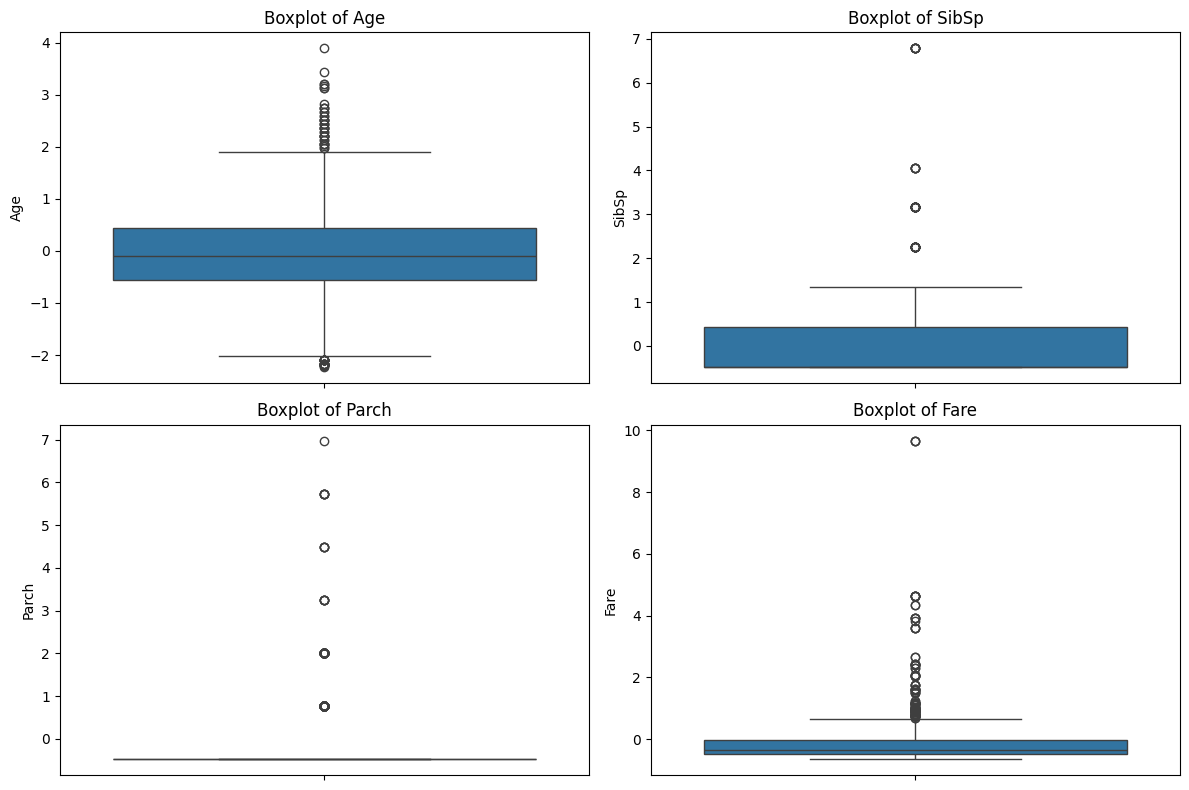

In [26]:
# List of numerical features (excluding ID and target variable)
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Plot boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [27]:
# Function to remove outliers
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply outlier removal to each numerical column
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# Check new shape
print("🔹 Shape after outlier removal:", df.shape)

🔹 Shape after outlier removal: (561, 13)


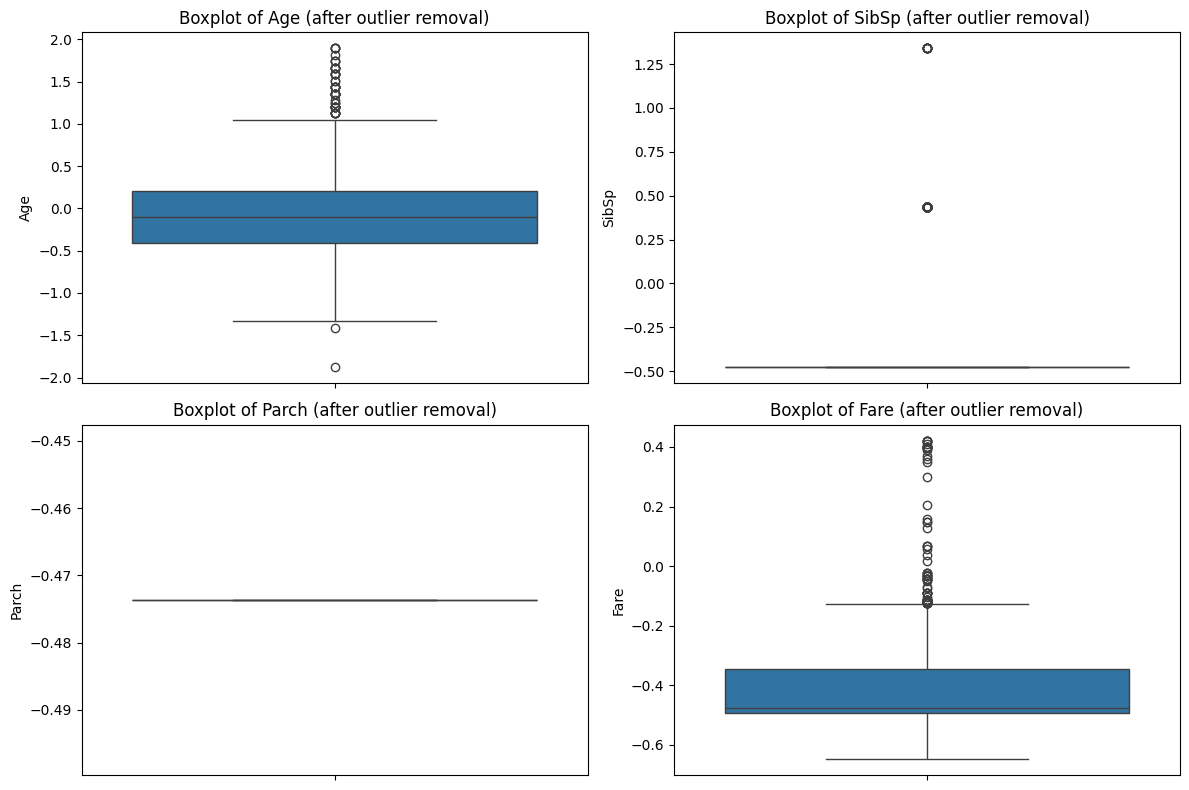

In [28]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (after outlier removal)')
plt.tight_layout()
plt.show()